# End-to-End Linear Regression with EDA.

# **Linear Regression**

Linear Regression is a parametric supervised learning algorithm used to model the linear relationship between a set of independent variables $X \in \mathbb{R}^n$ and a continuous target variable $Y$# .

The model assumes the following form:

$Y =\[
y = X\beta + \varepsilon
\]$

**where:**
* $𝑋$ is the feature matrix
* $𝛽$ is the vector of learned coefficients
* $𝜀$ represents the error term (assumed to be normally distributed with zero mean)


**Model Assumption**

* Linearity between features and target
* Independence of errors
* Homoscedasticity (constant variance of errors)
* No or low multicollinearity among features
* Errors are normally distributed (for inference)

**Evaluation**
In this notebook, the model performance is evaluated using:
* R² score: Measures the proportion of variance in the target explained by the model
* MAPE: Quantifies the average percentage error between predicted and actual values



# Import  Libraries

In [375]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_percentage_error, mean_absolute_error , mean_squared_error

# Data read from csv file.

In [376]:
data = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

# Explore the Data.

In [377]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [378]:
data.shape

(545, 13)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Checking if any data has null values.

In [380]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [381]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# outlier analysis and treatment

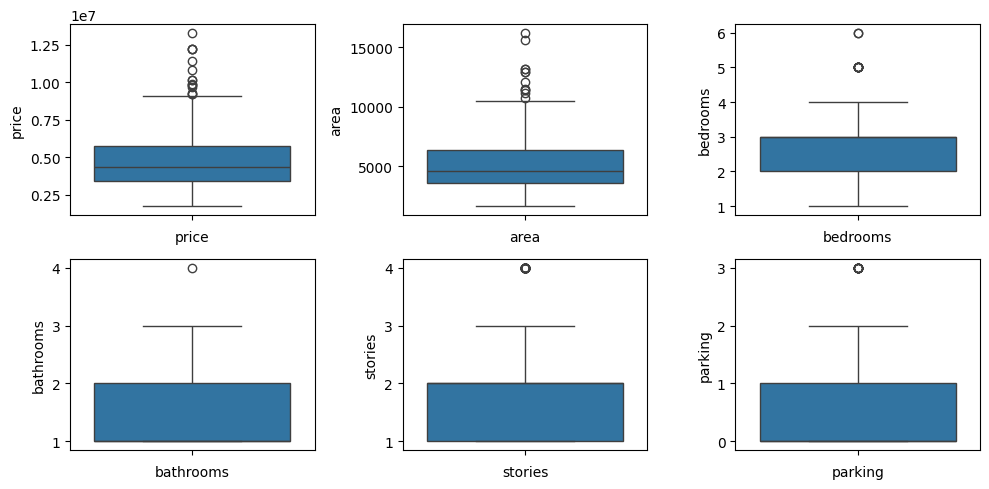

In [382]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0]).set(xlabel= 'price')
plt2 = sns.boxplot(data['area'], ax = axs[0,1]).set(xlabel='area')
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2]).set(xlabel='bedrooms')
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0]).set(xlabel='bathrooms')
plt2 = sns.boxplot(data['stories'], ax = axs[1,1]).set(xlabel='stories')
plt3 = sns.boxplot(data['parking'], ax = axs[1,2]).set(xlabel='parking')

plt.tight_layout()

In [383]:
len(data)

545

## outlier treatment for price

In [384]:
Q1 = data.price.quantile(0.25) # data['price'].quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
print(Q3,Q1)

5740000.0 3430000.0


In [385]:
len(data)

530

## outlier treatment for area

In [386]:

Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
print(f'Q1 : {Q1} , Q3 : {Q3}')
IQR = Q3 - Q1
print(f'IQR : {IQR} ')
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]

Q1 : 3547.5 , Q3 : 6315.75
IQR : 2768.25 


In [387]:
len(data)

517

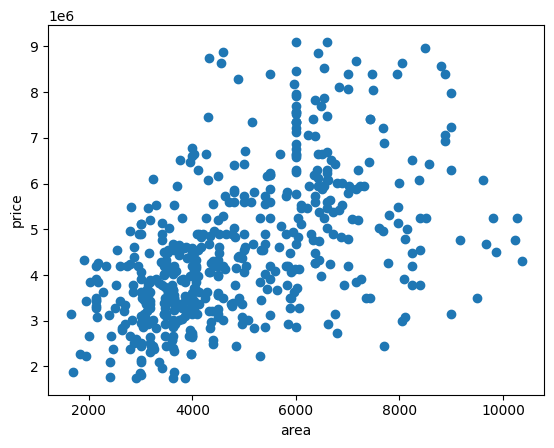

In [388]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(data['area'],data['price'])

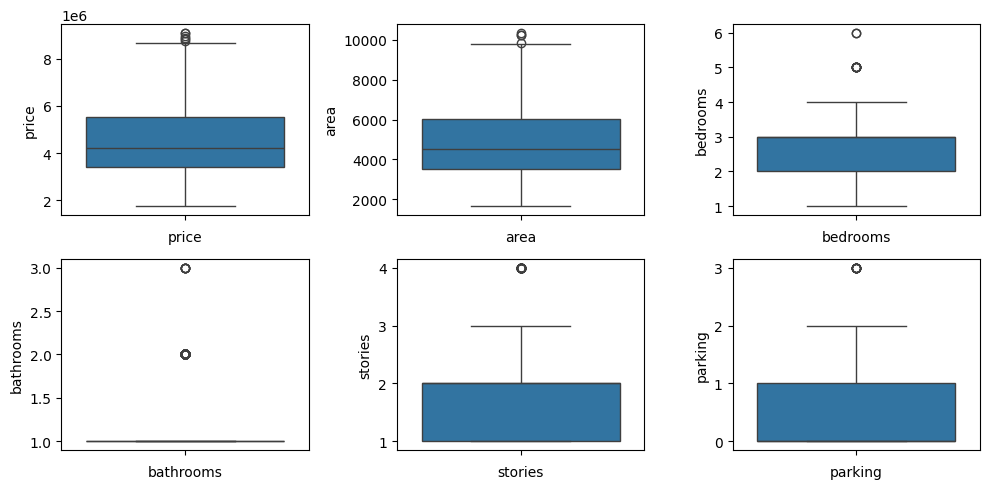

In [389]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0]).set(xlabel= 'price')
plt2 = sns.boxplot(data['area'], ax = axs[0,1]).set(xlabel='area')
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2]).set(xlabel='bedrooms')
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0]).set(xlabel='bathrooms')
plt2 = sns.boxplot(data['stories'], ax = axs[1,1]).set(xlabel='stories')
plt3 = sns.boxplot(data['parking'], ax = axs[1,2]).set(xlabel='parking')

plt.tight_layout()

In [390]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Correlation of output with numerical variables
## plotting correlation heatmap

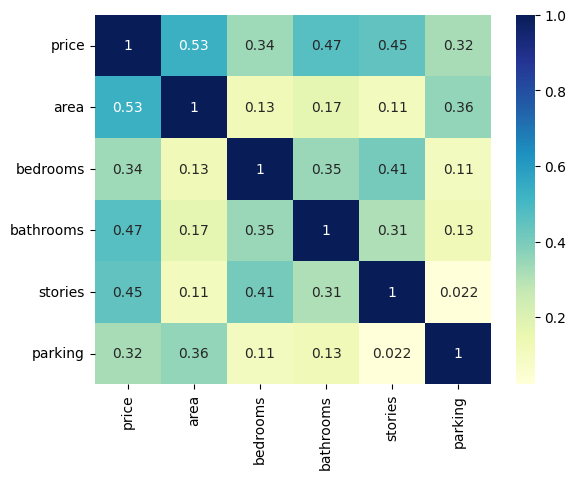

In [391]:
dataplot = sns.heatmap(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories','parking']].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

## Visualizing categorical variables

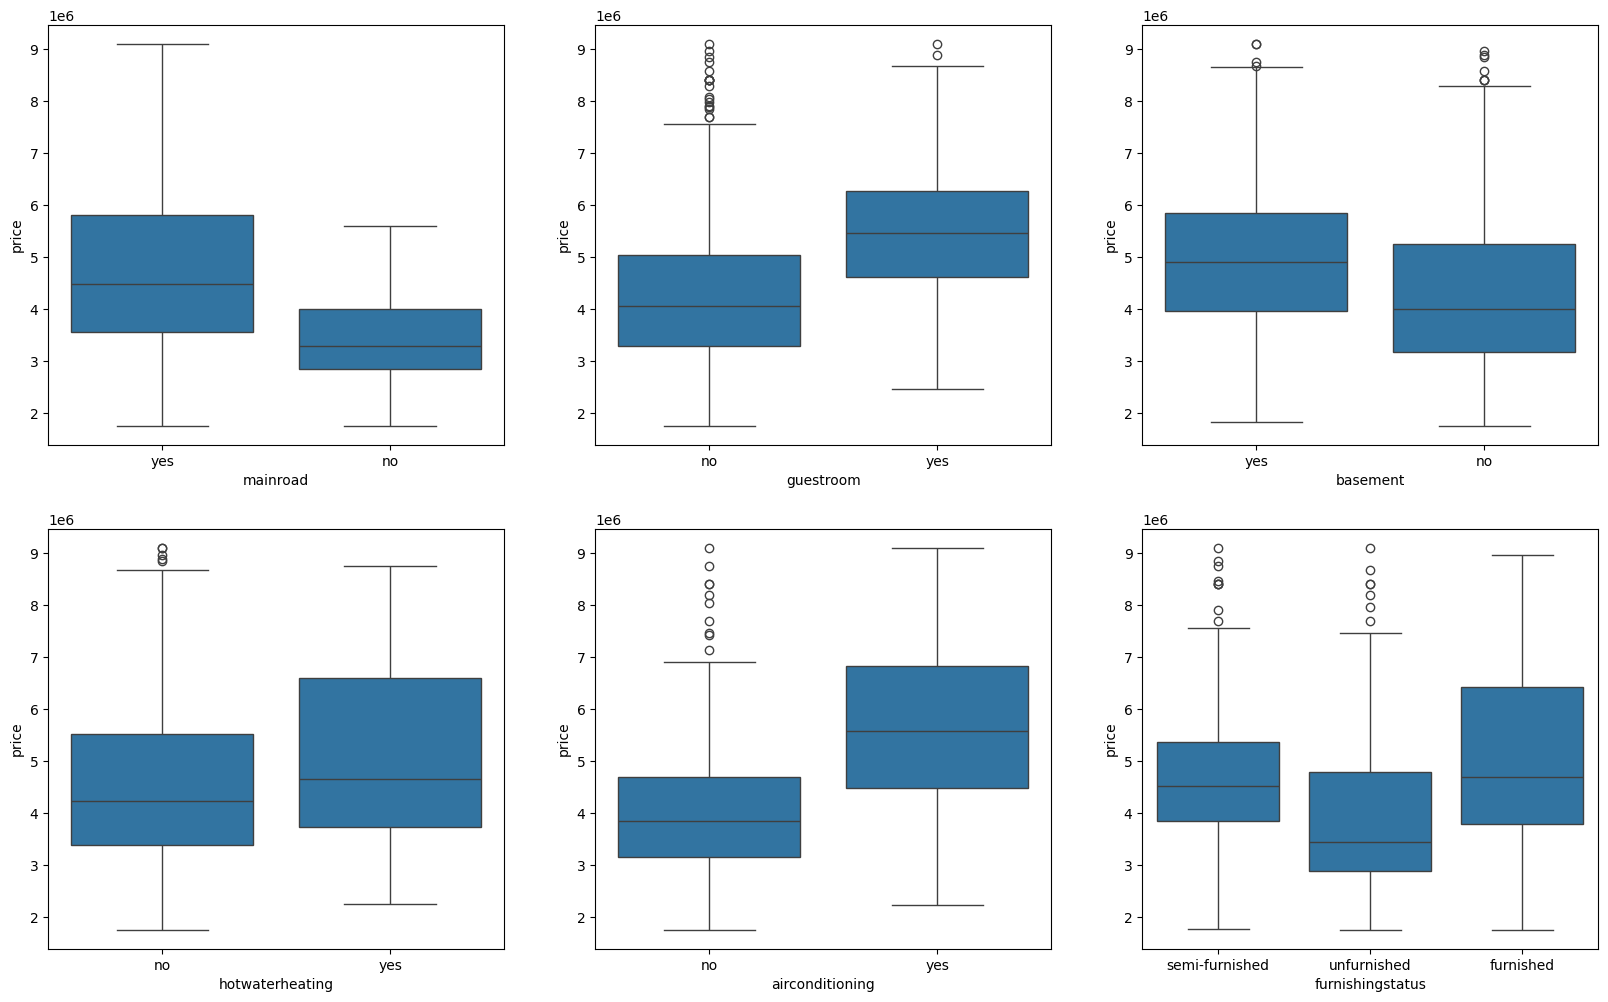

In [392]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

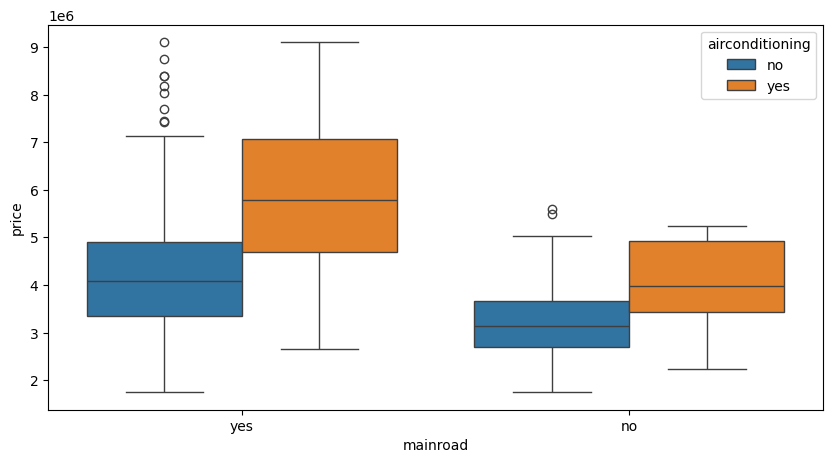

In [393]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mainroad', y = 'price', hue = 'airconditioning', data = data)
plt.show()

## Convert data to feature

In [394]:
# List of variables to map

cat_features =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def create_features(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[cat_features] = data[cat_features].apply(create_features)

In [395]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [396]:
data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    215
unfurnished       175
furnished         127
Name: count, dtype: int64

## Create dummy features for categorical variables

In [397]:
data_cat = pd.get_dummies(data['furnishingstatus'],drop_first=False).astype(int)

In [398]:
data = pd.concat([data, data_cat], axis = 1)
data.drop(['furnishingstatus'], axis = 1, inplace = True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


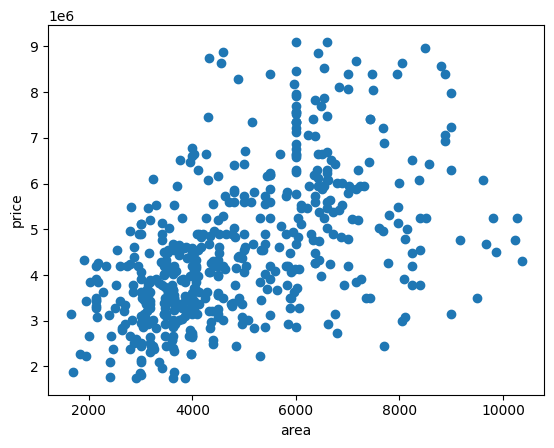

In [399]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(data['area'],data['price'])

## Train test split and Data Scaling

In [400]:
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 42)

In [401]:
scaler = MinMaxScaler()

In [402]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [403]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,4.534067e+06,0.368285,0.387893,0.130751,0.263923,0.845036,0.169492,0.343826,0.048426,0.314770,0.212268,0.203390,0.256659,0.394673,0.348668
std,1.561697e+06,0.200844,0.145977,0.230762,0.289185,0.362309,0.375641,0.475560,0.214925,0.464987,0.274560,0.403008,0.437319,0.489373,0.477127
min,1.750000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.395000e+06,0.216963,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+06,0.319063,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.495000e+06,0.504699,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000,1.000000
max,9.100000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [404]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [405]:
y_train = df_train.pop('price') # df_train['price'] #labels in training data
x_train = df_train # features in training data

In [406]:
y_test = df_test.pop('price') # df_test['price'] #lables in test data
x_test = df_test # features in test data

In [407]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train) # training

LinearRegression()

In [408]:
print(lr_model.coef_)

[2122621.95550406  498373.98119342 1400151.42538715 1378550.71215474
  389351.46347969  417119.93326733  309972.44958275  694272.52380302
  867780.084698    643079.16525995  513811.01477822   91256.10655156
   88757.77073987 -180013.87729144]


In [409]:
print(lr_model.intercept_)

1962361.1438332237


## residual analysis

In [410]:
y_train_pred = lr_model.predict(x_train)
residuals = (y_train_pred - y_train)

Text(0.5, 0, 'Errors')

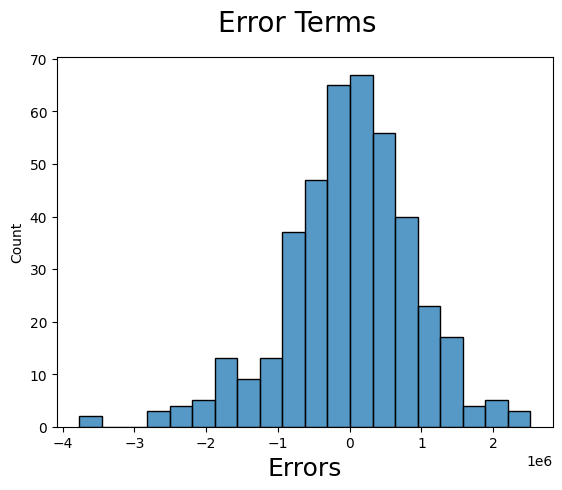

In [411]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.histplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

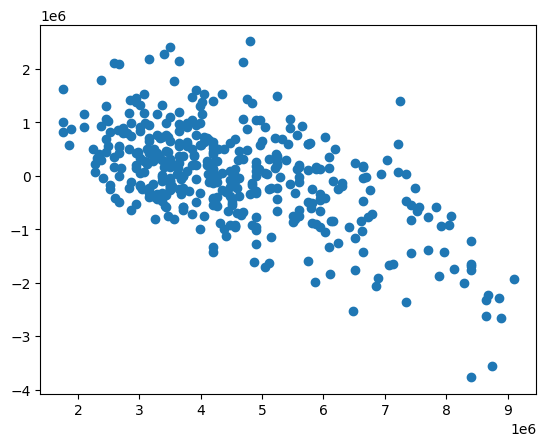

In [412]:
plt.scatter(y_train,residuals)
plt.show()

## Making predictions

In [413]:
y_test_pred = lr_model.predict(x_test)

In [414]:

r2_score(y_test, y_test_pred)

0.6747673447811062

In [415]:
mean_absolute_percentage_error(y_test, y_test_pred)

0.1756714273408884

### Results would improve if we get more data to train the model
### Some additional fetaures like distance from best school, shoppig and entertainment options etc would also help

## Plotting y_test and y_pred to understand the spread.

Text(0, 0.5, 'y_test_pred')

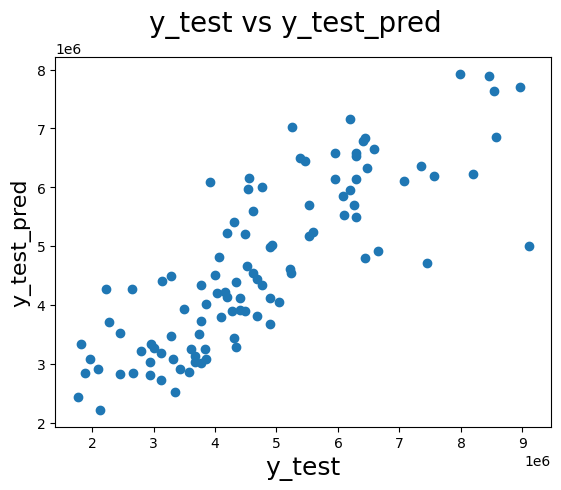

In [416]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

# **✅ Conclusion**

In this notebook, a Linear Regression model was developed to predict the target variable using structured data preprocessing and feature engineering techniques. The model demonstrated reasonable predictive performance, achieving an **R² score of approximately 0.67** and a **MAPE of around 17.6%**, indicating that the model captures the underlying trend in the data with acceptable error.

Linear Regression served as a strong baseline due to its simplicity and interpretability. While the results are satisfactory, further improvements can be achieved by incorporating advanced feature engineering, regularization techniques, or nonlinear models.

# **🔮 Future Work**

* Apply Ridge, Lasso, or ElasticNet regression

* Explore polynomial features to capture nonlinearity

* Perform cross-validation for more robust evaluation

* Some additional fetaures like distance from best school, shoppig and entertainment options etc would also help

# **📌 Key Takeaway**

This notebook establishes a solid baseline model and provides a foundation for experimenting with more advanced regression techniques.

